# Exercise 5: 

As seen in exercise 3 of this week, we can write the background scalar field equation as:
$$
\ddot{\Phi}+3H\dot{\Phi}+V'\left(\Phi\right)=0
$$
where $\Phi$ rapresents the scalr field, $V'\left(\Phi\right)=\frac{\partial V}{\partial \Phi}$ and the expression is written in cosmic time.

The other equation that regulates the evolution of H in time is given by Baumann'article, in Plank's mass units, on inflation (Appendix B1, pag.143) and state:
$$
H^2=\frac{1}{3}\left(\frac{1}{2}\dot{\Phi}^2+V\left(\Phi\right)\right)
$$

**OBS.:** the full expression would be:
$$
H^2=\frac{1}{3M_P}\left(\frac{1}{2}\dot{\Phi}^2+V\left(\Phi\right)\right)
$$
where $M_P$ is the Plank's mass: $M_P\sim 2.4\cdot10^{18}GeV$

With the proposed potential, we then have:
$$
\ddot{\Phi}+3H\dot{\Phi}+m\Phi=0\\
H^2=\frac{1}{6}\left(\dot{\Phi}^2+m\Phi^2\right)
$$


The idea is to exploit a useful trick to solve this system. 
In particular, we want to reduce it to a system of first order differential equations.
Hence, we redefine: 
$$
u = \dot{\Phi}
$$
As a consequence, the first order ODEs system is composed by:
$$
\dot{u}+3Hu+m\Phi=0 \\
u = \dot{\Phi}
$$
under the constraint:
$$
H=\sqrt{\frac{1}{6}\left(u^2+m\Phi^2\right)}
$$

To further explain the following code, assume that:
$$
u[1] = \dot{\Phi} \\
u[0] = \Phi
$$
which leads to the 3 follwing eqautions:
$$
\dot{u}[1]+3Hu[1]+mu[0]=0 \\
u[1] = \dot{\Phi}\\
H=\sqrt{\frac{1}{6}\left(u[1]^2+mu[0]^2\right)}
$$

# Slow Roll Inflation

As we discussed, inflation happens under the so called slow roll conditions.
To monitor this condition, we take the slow roll parameter as defined in Baumann Chapter 2 (pag. 38, pag. 42 PDF):
$$
\epsilon = \frac{\dot{\Phi}}{2H^2}
$$
with a factor $\frac{1}{M_P}$ put equal to 1.

This parameter has to be greatly smaller then 1 to provide the searched conditions, i. e. the contribution of the cinetic energy $T_{\Phi}=\frac{1}{2}\dot{\Phi}^2$ has to be a small contribution to the total energy density of the system $\rho_{\Phi}=3H^2$, where a factor $M_P^2$ has been put to 1.

It is also useful to define a second slow roll parameter, i.e. $\eta$.
Following Baumann's convention, we start defining another parameter:
$$
\delta = - \frac{\ddot{\Phi}}{H\dot{\Phi}}
$$

From this definition, we have:
$$
\eta = 2(\epsilon - \delta)
$$

In the slow roll approximation, it is customary to define two other parameters depending on our potential:
$$
\epsilon_V = \frac{1}{2}\left(\frac{V'}{V}\right)^2 \\ 
|\eta_V| = \frac{|V''|}{V}
$$
where in both formula a factor $M_P^2$ has been dropped out.

Note that in our approximation, the last two parameters reduces to:
$$
\epsilon_V = \eta_V = \frac{2}{\Phi^2}
$$
dropping again a factor $M_P^2$.

In [91]:
# Useful imports
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [92]:
# Defining useful parameters

m = 0.1 # in Plank's Mass
phi0 = 15.0 # in Plank's Mass
phi_dot0 = 0.1 # in Plank's Mass

In [93]:
# Defining the sys of differential equations
'''
def phi_derivatives(u, t):
    H = np.sqrt( (u[1]**2 + m*u[0]**2) / 6 )
    return [u[1], -3 * H * u[1] - m * u[0]]
'''
def phi_derivatives(u, t):
    return [u[1], -3 * np.sqrt( (u[1]**2 + m*u[0]**2) / 6 ) * u[1] - m * u[0]]

In [94]:
# Time interval in Plank's unit
t0 = 1.
tf = 50.
dt = 0.1
time = np.arange(t0, tf, dt)

In [95]:
phi, phi_dot = odeint(phi_derivatives, [phi0, phi_dot0], time).T

In [96]:

# Defining the function that must be solved with its costraint (it rapresents the ODE)
'''
def evolution(phi, phi_dot, t):
    # Computing the constraint at a given time value
    H = np.sqrt( (phi_dot**2 + m*phi**2) / 6 )
    # Computing the differential equation
    phi_dot_dot = -3 * H * phi_dot - m * phi

    return phi_dot_dot
'''

'\ndef evolution(phi, phi_dot, t):\n    # Computing the constraint at a given time value\n    H = np.sqrt( (phi_dot**2 + m*phi**2) / 6 )\n    # Computing the differential equation\n    phi_dot_dot = -3 * H * phi_dot - m * phi\n\n    return phi_dot_dot\n'

In [97]:
time.shape, phi.shape


((490,), (490,))

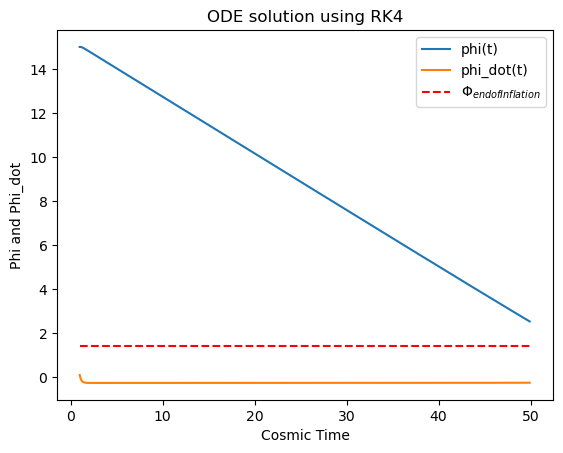

In [98]:
# Result plot
phi_end =np.sqrt(2) 
plt.plot(time, phi, label='phi(t)')
plt.plot(time, phi_dot, label='phi_dot(t)')
plt.hlines(phi_end, t0, tf, colors='r', linestyles='dashed', label=r'$\Phi_{end of Inflation}$')
plt.xlabel('Cosmic Time')
plt.ylabel('Phi and Phi_dot')
plt.title('ODE solution using RK4')
plt.legend(loc='best')
plt.grid(False)
plt.show()


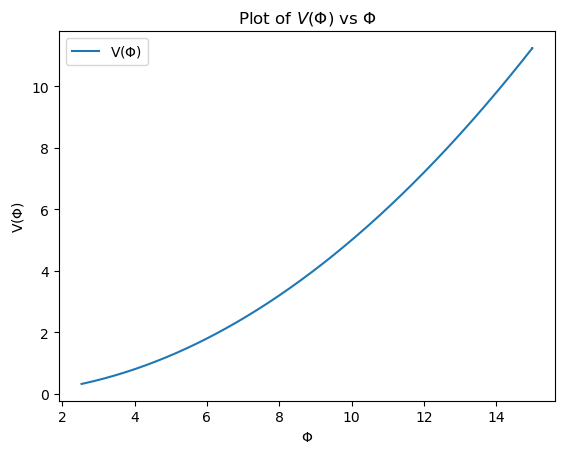

In [99]:
# Compute V(phi)
V = m * phi**2 / 2

# Plot V(phi) vs phi
plt.plot(phi, V, label='V($\Phi$)')
plt.xlabel('$\Phi$')
plt.ylabel('V($\Phi$)')
plt.title('Plot of $V(\Phi)$ vs $\Phi$')
plt.legend()
# Reverse the x-axis
#plt.gca().invert_xaxis()
plt.grid(False)
plt.show()


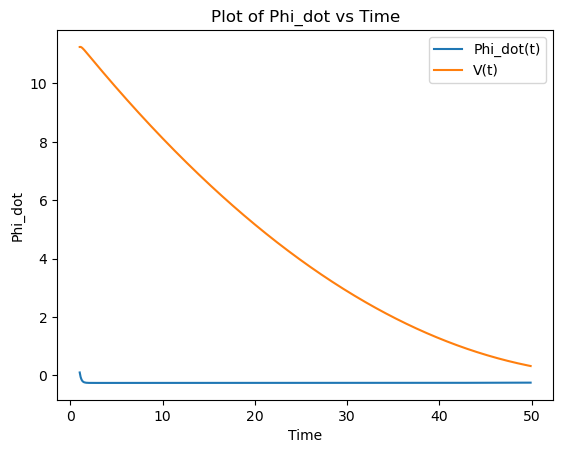

In [100]:
# Compute Phi_dot
# Plot Phi_dot vs time
plt.plot(time, phi_dot, label='Phi_dot(t)')
plt.plot(time, V, label='V(t)')
plt.xlabel('Time')
plt.ylabel('Phi_dot')
plt.title('Plot of Phi_dot vs Time')
plt.legend(loc='best')
plt.grid(False)
plt.show()



In [101]:
# Slow roll parameter eps
H = np.sqrt( (phi_dot**2 + m*phi**2) / 6 )
eps = phi_dot**2 / ( 2 * H )

#Slow roll parameter in terms of potential
V_prime = m * phi
eps_V = 0.5 * ( V_prime / V )**2  

eps_V_simp = 2 * ( 1 / phi )**2

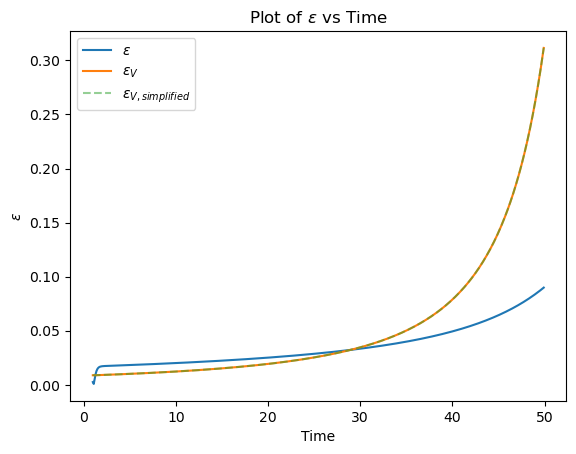

In [102]:
plt.plot(time, eps, label=r'$\epsilon$')
plt.plot(time, eps_V, label=r'$\epsilon_V$')
plt.plot(time, eps_V_simp, label=r'$\epsilon_{V, simplified}$', ls= '--', alpha=0.5)
plt.xlabel('Time')
plt.ylabel(r'$\epsilon$')
plt.title(r'Plot of $\epsilon$ vs Time')
plt.legend(loc='best')
plt.grid(False)
plt.show()


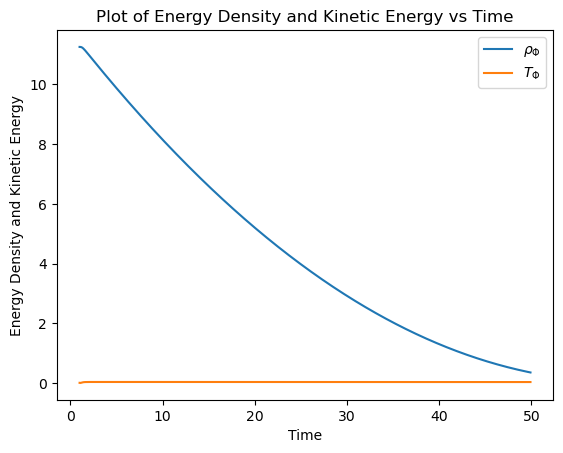

In [103]:
# Check contribution of energy density with respect to the total energy density
rho_phi = 3 * H**2
T_phi = 0.5 * phi_dot**2

plt.plot(time, rho_phi, label=r'$\rho_{\Phi}$')
plt.plot(time, T_phi, label=r'$T_{\Phi}$')
plt.xlabel('Time')
plt.ylabel('Energy Density and Kinetic Energy')
plt.title('Plot of Energy Density and Kinetic Energy vs Time')
plt.legend(loc='best')
plt.grid(False)
plt.show()


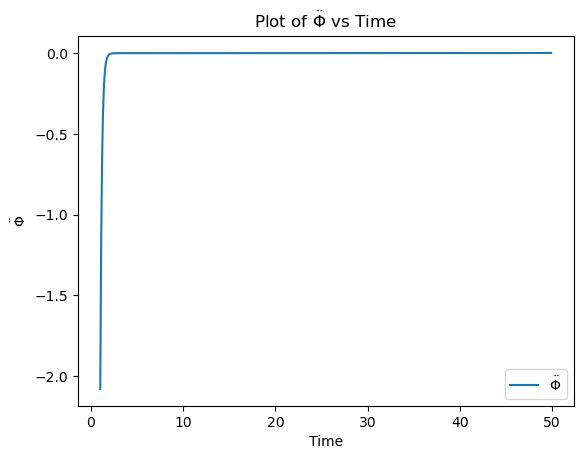

In [104]:
# Slow roll parameter eta

# Phi_dotdot
phi_dotdot = -3 * H * phi_dot - m * phi

plt.plot(time, phi_dotdot, label=r'$\ddot{\Phi}$')
plt.xlabel('Time')
plt.ylabel(r'$\ddot{\Phi}$')
plt.title(r'Plot of $\ddot{\Phi}$ vs Time')
plt.legend(loc='best')
plt.grid(False)
plt.show()



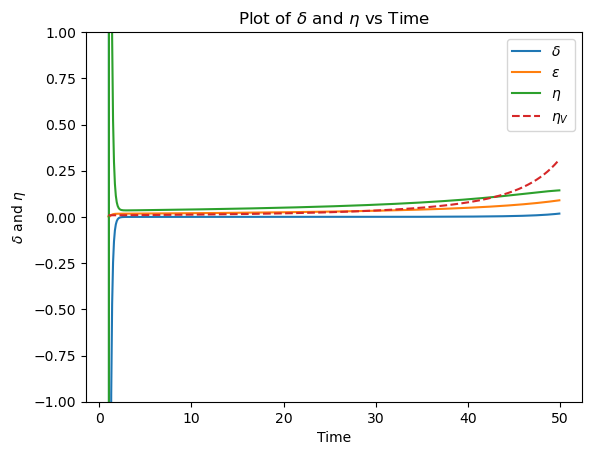

In [105]:
delta = -phi_dotdot / ( H * phi_dot )
eta = 2 * ( eps - delta )
eta_V = eps_V

plt.plot(time, delta, label=r'$\delta$')
plt.plot(time, eps, label=r'$\epsilon$')
plt.plot(time, eta, label=r'$\eta$')
plt.plot(time, eta_V, label=r'$\eta_V$', ls='--')
plt.xlabel('Time')
plt.ylabel(r'$\delta$ and $\eta$')
plt.title(r'Plot of $\delta$ and $\eta$ vs Time')
plt.ylim(-1, 1)
plt.legend(loc='best')
plt.grid(False)
plt.show()


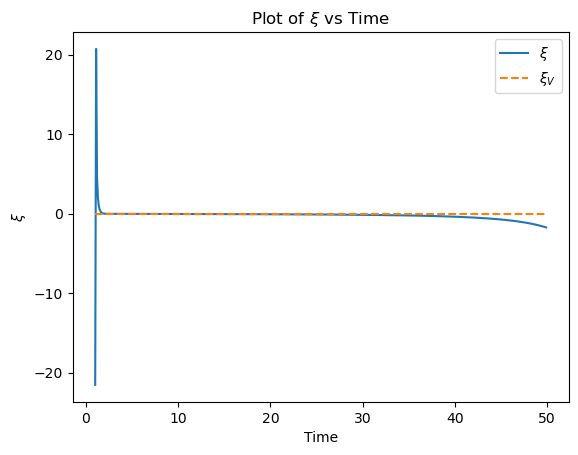

In [106]:
# Slow roll parameter xi
xi = 2 * ( eps - delta - 3 * eps_V )
xi_V = 2 * ( eps_V - eta_V )

plt.plot(time, xi, label=r'$\xi$')
plt.plot(time, xi_V, label=r'$\xi_V$', ls='--')
plt.xlabel('Time')
plt.ylabel(r'$\xi$')
plt.title(r'Plot of $\xi$ vs Time')
plt.legend(loc='best')
plt.grid(False)
plt.show()
